# S0 - just experimenting with GPs, kernels and visualisation

## Packages

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42
np.random.seed(SEED)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern

## Utility functions

In [133]:
def suggestion_to_out(suggested_X):
    # todo: disallow 0 or 1 (after rounding)
    return '-'.join([
        '{:.6f}'.format(x) for x in suggested_X
    ])
    

In [461]:
# check that
suggestion_to_out([
    0,
    0.0000004,
    0.0000005, # python error - should be rounded to 0.000001
    0.000001,
    0.5555554,
    0.5555556, # error with 0.5555555
    0.999999,
    0.9999994,
    0.9999995,
    1
])

'0.000000-0.000000-0.000000-0.000001-0.555555-0.555556-0.999999-0.999999-1.000000-1.000000'

## Suggest method

In [5]:
# experimenting with creating a surrogate and acquisition functions

def week_1_suggest(f, beta=1.96):

        f_beta = beta # adjust this so we are exploring for the first 3, then gradually moving to exploit towards the last 3, out of a max of 12
        f_noise_assumption = 1e-10
        f_rbf_lengthscale = 0.1
        
        def f_surrogate_predict(test_X):
            # f_kernel = RBF(length_scale=f_rbf_lengthscale, length_scale_bounds='fixed')
            from sklearn.gaussian_process.kernels import Matern
            f_kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)
            f_gp = GaussianProcessRegressor(kernel=f_kernel, random_state=0).fit(f['df'][f['X_cols']], f['df']['y'])
            return f_gp.predict(test_X, return_std=True)
    
        # fill df with all possible values
    
        print('\n', f['name'])
        
        from itertools import product
        x_space = np.arange(0.000001, 1, 0.1) # todo: increase fidelity as we move from exploration to exploitation?
        df_t = pd.DataFrame(list(product(*[x_space for x in f['X_cols']]))) # create a dataframe with all poss combinations
            # overwrite or exclude combinations we already have?
        print(df_t.shape[0], ' combinations')
        
        # use surrogate to get preds
        df_t['y-mean'], df_t['y-std'] = f_surrogate_predict(df_t) # surrogate function
    
        # acquisition function to calclate value
        df_t['acq-value'] = df_t['y-mean'] + (f_beta * df_t['y-std'])
    
        # what's the most valuable?
        # display(df_t.sort_values(by='acq-value', ascending=False).head(1))
        best = df_t.sort_values(by='acq-value', ascending=False, ignore_index=True)
        display(best.head(10))    
        print(f['name'], 'suggested next values:', suggestion_to_out(best.loc[0][f['X_cols']]))

        return best.loc[0][f['X_cols']]
    
        # pretty pictures
        # fig, ax = plt.subplots(1, len(f['X_cols']))
        
        # for c in f['X_cols']:
        #     # for speed, just plot a subsample
        #     if df_t.shape[0] > 2500:
        #         subsample = df_t.sample(2500)
        #     else:
        #         subsample = df_t
        #     # fig, ax = plt.subplots()
        #     axt = ax[c].twinx()
        #     subsample.plot.scatter(x=c, y='y-mean', figsize=(12,4), ax=ax[c], s=0.5, alpha=0.7, color='g')
        #     subsample.plot.scatter(x=c, y='acq-value', figsize=(12,4), ax=axt, s=0.5, alpha=0.5, color='r')
        #     pd.DataFrame([best]).plot.scatter(x=c, y='acq-value', figsize=(12,4), ax=axt, s=40, marker='+', color='r')
        #     # ax[c].fill_between(
        #     #     subsample[c],
        #     #     subsample['y-mean'] - (subsample['y-std']),
        #     #     subsample['y-mean'] + (subsample['y-std']),
        #     #     alpha = 0.2,
        #     #     label = str(f1_beta) + ' Standard Deviations'
        #     # )
        #     f['df'].plot.scatter(x=c, y='y', figsize=(12,4), ax=ax[c], s=40, marker='+', color='b')
        #     ax[c].legend(['Surrogate', 'Actuals'])
        #     axt.legend(['Acquisition value'])
        
        # plt.tight_layout()
        # plt.show()
    
        # del fig, ax, axt
    
        # break

In [6]:
# experimenting with creating a surrogate and acquisition functions

def week_1_suggest_2(f, beta=1.96):

        f_beta = beta # adjust this so we are exploring for the first 3, then gradually moving to exploit towards the last 3, out of a max of 12
        f_noise_assumption = 1e-10
        f_rbf_lengthscale = 0.1
        
        def f_surrogate_predict(test_X):
            # f_kernel = RBF(length_scale=f_rbf_lengthscale, length_scale_bounds='fixed')
            from sklearn.gaussian_process.kernels import Matern
            f_kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)
            f_gp = GaussianProcessRegressor(kernel=f_kernel, random_state=0).fit(f['df'][f['X_cols']], f['df']['y'])
            return f_gp.predict(test_X, return_std=True)
    
        # fill df with all possible values
    
        print('\n', f['name'])
        
        from itertools import product
        x_space = np.arange(0.000001, 1, 0.1) # todo: increase fidelity as we move from exploration to exploitation?
        df_t = pd.DataFrame(list(product(*[x_space for x in f['X_cols']]))) # create a dataframe with all poss combinations
            # overwrite or exclude combinations we already have?
        print(df_t.shape[0], ' combinations')
        
        # use surrogate to get preds
        df_t['y-mean'], df_t['y-std'] = f_surrogate_predict(df_t) # surrogate function
    
        # acquisition function to calclate value
        df_t['acq-value'] = df_t['y-mean'] + (f_beta * df_t['y-std'])
    
        # what's the most valuable?
        # display(df_t.sort_values(by='acq-value', ascending=False).head(1))
        best = df_t.sort_values(by='acq-value', ascending=False, ignore_index=True)
        display(best.head(10))    
        print(f['name'], 'suggested next values:', suggestion_to_out(best.loc[0][f['X_cols']]))

        return best.loc[0][f['X_cols']]
    
        # pretty pictures
        # fig, ax = plt.subplots(1, len(f['X_cols']))
        
        # for c in f['X_cols']:
        #     # for speed, just plot a subsample
        #     if df_t.shape[0] > 2500:
        #         subsample = df_t.sample(2500)
        #     else:
        #         subsample = df_t
        #     # fig, ax = plt.subplots()
        #     axt = ax[c].twinx()
        #     subsample.plot.scatter(x=c, y='y-mean', figsize=(12,4), ax=ax[c], s=0.5, alpha=0.7, color='g')
        #     subsample.plot.scatter(x=c, y='acq-value', figsize=(12,4), ax=axt, s=0.5, alpha=0.5, color='r')
        #     pd.DataFrame([best]).plot.scatter(x=c, y='acq-value', figsize=(12,4), ax=axt, s=40, marker='+', color='r')
        #     # ax[c].fill_between(
        #     #     subsample[c],
        #     #     subsample['y-mean'] - (subsample['y-std']),
        #     #     subsample['y-mean'] + (subsample['y-std']),
        #     #     alpha = 0.2,
        #     #     label = str(f1_beta) + ' Standard Deviations'
        #     # )
        #     f['df'].plot.scatter(x=c, y='y', figsize=(12,4), ax=ax[c], s=40, marker='+', color='b')
        #     ax[c].legend(['Surrogate', 'Actuals'])
        #     axt.legend(['Acquisition value'])
        
        # plt.tight_layout()
        # plt.show()
    
        # del fig, ax, axt
    
        # break

In [22]:
def plot_gpr_samples_multi_col(gpr_model, n_samples, n_cols=1, ax=None):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    x_space = np.linspace(0, 1, 10)
    
    from itertools import product
    X = np.array(list(product(*[x_space for i in range(n_cols)])))
    print(X.shape)
    # X = x.reshape(-1, n_cols)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    df = pd.DataFrame(X)
    df['y_mean'] = y_mean
    display(df)

    # print(y_mean)
    for i in range(n_cols):

        for idx, single_prior in enumerate(y_samples.T):
            ax[i].plot(
                X[:,i],
                single_prior,
                linestyle="--",
                alpha=0.7,
                label=f"Sampled function #{idx + 1}",
            )
        ax[i].plot(X[:,i], y_mean, color="black", label="Mean")
        ax[i].fill_between(
            X[:,i],
            y_mean - y_std,
            y_mean + y_std,
            alpha=0.1,
            color="black",
            label=r"$\pm$ 1 std. dev.",
        )
        ax[i].set_xlabel("x")
        ax[i].set_ylabel("y")

## Function 1: Searching for Contamination Sources

This may sound simple because you only have a two-dimensional input, however it is a very difficult problem. It corresponds to trying to find the source of radiation in some square area. However, you can only detect the radiation once you are very close to it, meaning most of the readings will be zero. There are two sources, one is not too dangerous, so make sure you try to find both modes of the function.

(10, 3)

,0,1,y
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


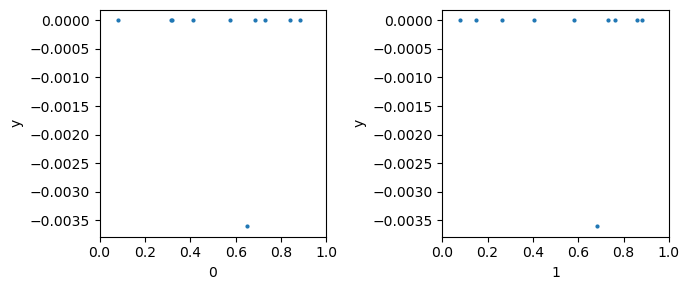

In [215]:
f1_folder = './function_1'
f1_initial_in = np.load(f1_folder + '/initial_inputs.npy')
f1_initial_out = np.load(f1_folder + '/initial_outputs.npy')

f1_df = pd.DataFrame(f1_initial_in) # columns=['x'+str(n+1) for n in range(f1_initial_in.shape[1])]
f1_X_cols = f1_df.columns # 0,1,...,n map to x1, x2,...xn
f1_df['y'] = f1_initial_out # same as f(X), what we're trying to optimise

display(f1_df.shape)
display(f1_df)

# from sklearn.gaussian_process.kernels import Matern
# kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-150, 1.0), nu=1.5)
# gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
# gpr.fit(f1_df.drop(columns=[1,'y']), f1_df['y'])

fig, ax = plt.subplots(1, len(f1_X_cols))

for c in f1_X_cols:
    # plot_gpr_samples(gpr, n_samples=4, ax=ax[c])
    f1_df.plot.scatter(x=c, y='y', figsize=(7,3), ax=ax[c], s=4)
    ax[c].set_xlim(0, 1)

plt.tight_layout()
plt.show()

(10, 3)

,0,1,y
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


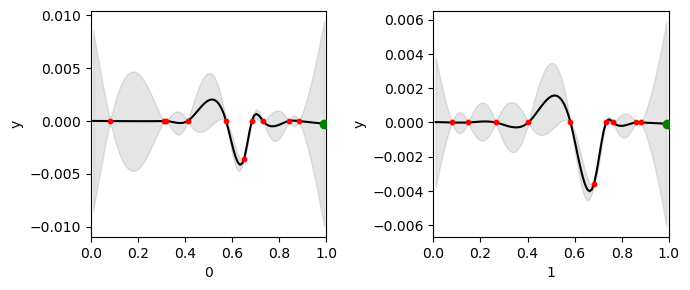


Suggestion: 0.990000-0.990000 

Col 0 top suggestions


,x,y,std,value
99,0.990000,-0.000249,0.009726,0.028930
0,0.010000,0.000010,0.008585,0.025766
98,0.980101,-0.000226,0.008537,0.025386
97,0.970202,-0.000204,0.007395,0.021980
1,0.019899,0.000009,0.007281,0.021852


Col 1 top suggestions


,x,y,std,value
99,0.990000,-0.000071,0.006000,0.017928
98,0.980101,-0.000065,0.005255,0.015701
97,0.970202,-0.000059,0.004542,0.013568
96,0.960303,-0.000052,0.003863,0.011535
0,0.010000,0.000022,0.003800,0.011423


In [229]:
beta = 3
ylim = (-0.005, 0.001)

display(f1_df.shape)
display(f1_df)

# f1_df.loc[10] = [.5,.1,.9]
# f1_df.loc[11] = [.1,.9,.9]

suggestion = []
af_dfs = []

fig, ax = plt.subplots(1, len(f1_X_cols))
for c in f1_X_cols:

    # surrogate model
    # kernel = RBF(1.0, length_scale_bounds=(1e-2, 1))
    kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 100), nu=1.5)
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(f1_df[[c]], f1_df['y'])

    # surrogate preds
    pred_X = np.linspace(0.01, 0.99, 100).reshape(-1, 1)
    pred_y_mean, pred_y_std = gpr.predict(pred_X, return_std=True)

    # acquisition function
    pred_value = pred_y_mean + (beta * pred_y_std)
    best_x = pred_X[np.argmax(pred_value),0]
    best_y = pred_y_mean[np.argmax(pred_value)]

    # plot charts
    ax[c].plot(pred_X[:,0], pred_y_mean, color="black", label="Mean")
    ax[c].fill_between(
        pred_X[:,0],
        pred_y_mean - pred_y_std,
        pred_y_mean + pred_y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax[c].scatter(x=best_x, y=best_y, zorder=110, color='g')
    f1_df.plot.scatter(x=c, y='y', figsize=(7,3), ax=ax[c], s=10, zorder=100, color='r')
    ax[c].set_xlim(0, 1)
    # ax[c].set_ylim(*ylim)

    af_dfs.append(pd.DataFrame({'x': pred_X[:,0], 'y': pred_y_mean, 'std': pred_y_std, 'value': pred_value}).sort_values(by='value', ascending=False).head(5))
    suggestion.append(best_x)

plt.tight_layout()
plt.show()

print('\nSuggestion:', suggestion_to_out(suggestion), '\n')
for i, df in enumerate(af_dfs):
    print('Col', i, 'top suggestions')
    display(df)

## Function 2: Optimising Noisy Models

This corresponds to trying to optimise an unknown machine learning model. However, the initialization of the model is very important, meaning your observations will be very noisy, and the problem might have a lot of local optima! You are trying to make the model’s log-likelihood as large as possible.

(10, 3)

,0,1,y
0,0.665800,0.123969,0.538996
1,0.877791,0.778628,0.420586
2,0.142699,0.349005,-0.065624
3,0.845275,0.711120,0.293993
4,0.454647,0.290455,0.214965


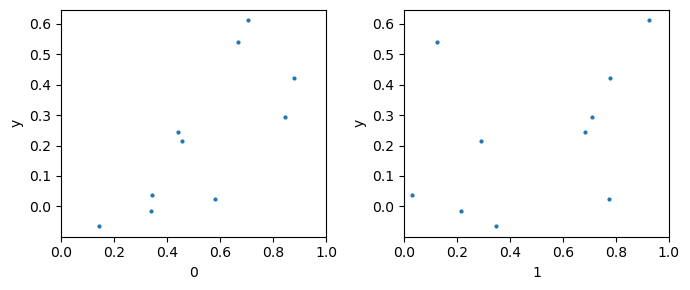

In [231]:
f2_folder = './function_2'
f2_initial_in = np.load(f2_folder + '/initial_inputs.npy')
f2_initial_out = np.load(f2_folder + '/initial_outputs.npy')

f2_df = pd.DataFrame(f2_initial_in)
f2_X_cols = f2_df.columns
f2_df['y'] = f2_initial_out

display(f2_df.shape)
display(f2_df.head())

fig, ax = plt.subplots(1, len(f2_X_cols))

for c in f2_X_cols:
    f2_df.plot.scatter(x=c, y='y', figsize=(7,3), ax=ax[c], s=4)
    ax[c].set_xlim(0, 1)

plt.tight_layout()
plt.show()

(10, 3)

,0,1,y
0,0.665800,0.123969,0.538996
1,0.877791,0.778628,0.420586
2,0.142699,0.349005,-0.065624
3,0.845275,0.711120,0.293993
4,0.454647,0.290455,0.214965
5,0.577713,0.771973,0.023106
6,0.438166,0.685018,0.244619
7,0.341750,0.028698,0.038749
8,0.338648,0.213867,-0.013858
9,0.702637,0.926564,0.611205


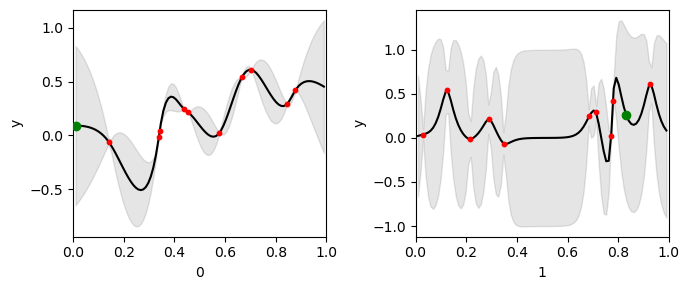


Suggestion: 0.010000-0.831616 

Col 0 top suggestions


,x,y,std,value
0,0.010000,0.091176,0.740624,2.313048
99,0.990000,0.453824,0.616664,2.303816
1,0.019899,0.090789,0.709697,2.219878
98,0.980101,0.467585,0.575427,2.193865
2,0.029798,0.089508,0.675594,2.116289


Col 1 top suggestions


,x,y,std,value
83,0.831616,0.259062,0.968225,3.163736
82,0.821717,0.354132,0.931879,3.149770
84,0.841515,0.194319,0.984741,3.148543
85,0.851414,0.158091,0.990597,3.129883
86,0.861313,0.148051,0.989318,3.116004


In [233]:
beta = 3
ylim = (-0.005, 0.001)

display(f2_df.shape)
display(f2_df)

suggestion = []
af_dfs = []

fig, ax = plt.subplots(1, len(f2_X_cols))
for c in f2_X_cols:

    # surrogate model
    # kernel = RBF(1.0, length_scale_bounds=(1e-2, 1))
    kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 100), nu=1.5)
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(f2_df[[c]], f2_df['y'])

    # surrogate preds
    pred_X = np.linspace(0.01, 0.99, 100).reshape(-1, 1)
    pred_y_mean, pred_y_std = gpr.predict(pred_X, return_std=True)

    # acquisition function
    pred_value = pred_y_mean + (beta * pred_y_std)
    best_x = pred_X[np.argmax(pred_value),0]
    best_y = pred_y_mean[np.argmax(pred_value)]

    # plot charts
    ax[c].plot(pred_X[:,0], pred_y_mean, color="black", label="Mean")
    ax[c].fill_between(
        pred_X[:,0],
        pred_y_mean - pred_y_std,
        pred_y_mean + pred_y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax[c].scatter(x=best_x, y=best_y, zorder=110, color='g')
    f2_df.plot.scatter(x=c, y='y', figsize=(7,3), ax=ax[c], s=10, zorder=100, color='r')
    ax[c].set_xlim(0, 1)
    # ax[c].set_ylim(*ylim)

    af_dfs.append(pd.DataFrame({'x': pred_X[:,0], 'y': pred_y_mean, 'std': pred_y_std, 'value': pred_value}).sort_values(by='value', ascending=False).head(5))
    suggestion.append(best_x)

plt.tight_layout()
plt.show()

print('\nSuggestion:', suggestion_to_out(suggestion), '\n')
for i, df in enumerate(af_dfs):
    print('Col', i, 'top suggestions')
    display(df)

## Function 3: Drug Discovery Problem

In this example, you are doing drug discovery! You can select three compounds to create a drug, and receive a measurement of the people’s adverse reaction to the drug. You want to make this as close as possible to zero. (hint: one of the variables may not cause any effects on the person).

(15, 4)

,0,1,2,y
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008


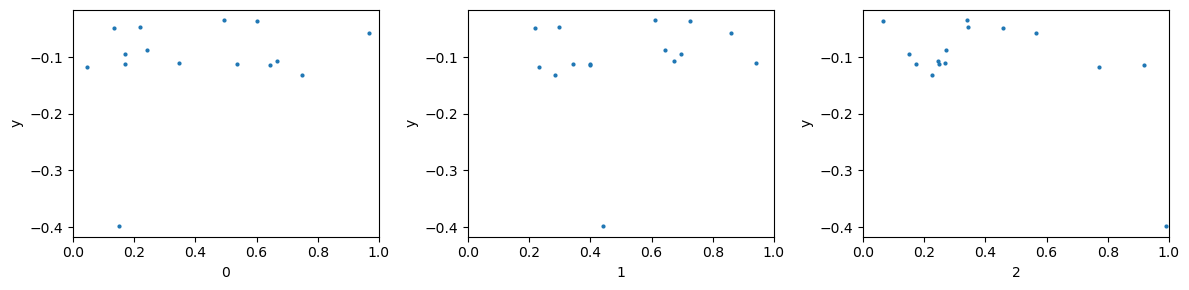

In [239]:
f3_folder = './function_3'
f3_initial_in = np.load(f3_folder + '/initial_inputs.npy')
f3_initial_out = np.load(f3_folder + '/initial_outputs.npy')

f3_df = pd.DataFrame(f3_initial_in)
f3_X_cols = f3_df.columns
f3_df['y'] = f3_initial_out

display(f3_df.shape)
display(f3_df.head())

fig, ax = plt.subplots(1, len(f3_X_cols))

for c in f3_X_cols:
    f3_df.plot.scatter(x=c, y='y', figsize=(12,3), ax=ax[c], s=4)
    ax[c].set_xlim(0, 1)

plt.tight_layout()
plt.show()

(15, 4)

,0,1,2,y
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
5,0.345523,0.941360,0.269363,-0.110621
6,0.151837,0.439991,0.990882,-0.398926
7,0.645503,0.397143,0.919771,-0.113869
8,0.746912,0.284196,0.226300,-0.131461
9,0.170477,0.697032,0.149169,-0.094190


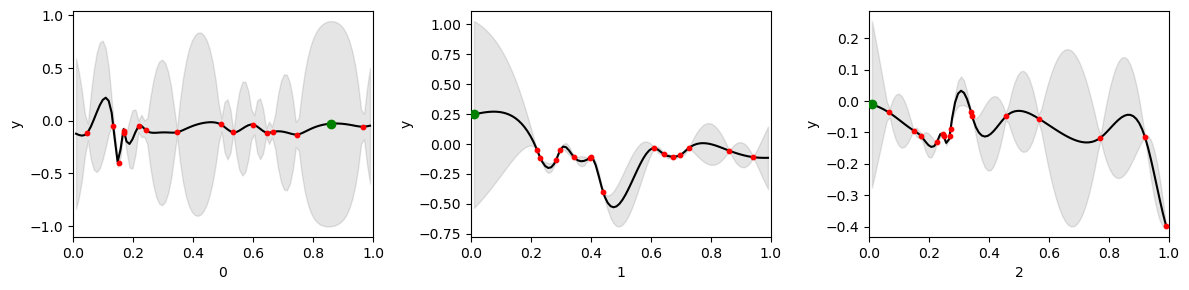


Suggestion: 0.861313-0.010000-0.010000 

Col 0 top suggestions


,x,y,std,value
86,0.861313,-0.027354,0.973894,2.894328
85,0.851414,-0.029879,0.973658,2.891096
87,0.871212,-0.026156,0.968744,2.880076
84,0.841515,-0.033823,0.968003,2.870187
88,0.881111,-0.026208,0.957372,2.845908


Col 1 top suggestions


,x,y,std,value
0,0.010000,0.246315,0.781229,2.590001
1,0.019899,0.251995,0.760541,2.533619
2,0.029798,0.257119,0.738191,2.471693
3,0.039697,0.261569,0.714089,2.403835
4,0.049596,0.265214,0.688146,2.329653


Col 2 top suggestions


,x,y,std,value
0,0.010000,-0.010838,0.265425,0.785438
66,0.663333,-0.114433,0.279694,0.724650
67,0.673232,-0.119086,0.280615,0.722758
65,0.653434,-0.109329,0.272989,0.709637
68,0.683131,-0.123198,0.275719,0.703958


In [247]:
beta = 3
ylim = (-0.005, 0.001)

display(f3_df.shape)
display(f3_df)

suggestion = []
af_dfs = []

fig, ax = plt.subplots(1, len(f3_X_cols), figsize=(12,3))
for c in f3_X_cols:

    # surrogate model
    # kernel = RBF(1.0, length_scale_bounds=(1e-2, 1))
    kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 100), nu=1.5)
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(f3_df[[c]], f3_df['y'])

    # surrogate preds
    pred_X = np.linspace(0.01, 0.99, 100).reshape(-1, 1)
    pred_y_mean, pred_y_std = gpr.predict(pred_X, return_std=True)

    # acquisition function
    pred_value = pred_y_mean + (beta * pred_y_std)
    best_x = pred_X[np.argmax(pred_value),0]
    best_y = pred_y_mean[np.argmax(pred_value)]

    # plot charts
    ax[c].plot(pred_X[:,0], pred_y_mean, color="black", label="Mean")
    ax[c].fill_between(
        pred_X[:,0],
        pred_y_mean - pred_y_std,
        pred_y_mean + pred_y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax[c].scatter(x=best_x, y=best_y, zorder=110, color='g')
    f3_df.plot.scatter(x=c, y='y', ax=ax[c], s=10, zorder=100, color='r')
    ax[c].set_xlim(0, 1)
    # ax[c].set_ylim(*ylim)

    af_dfs.append(pd.DataFrame({'x': pred_X[:,0], 'y': pred_y_mean, 'std': pred_y_std, 'value': pred_value}).sort_values(by='value', ascending=False).head(5))
    suggestion.append(best_x)

plt.tight_layout()
plt.show()

print('\nSuggestion:', suggestion_to_out(suggestion), '\n')
for i, df in enumerate(af_dfs):
    print('Col', i, 'top suggestions')
    display(df)

## Function 4: Fast, but Inaccurate Modelling

This example is for a particular business relying heavily on online sales. It can run very accurate calculations to figure out what is the optimal placement of their product across warehouses. Unfortunately, the calculations are extremely expensive (computationally) to run, so they can only do it once every two weeks. Instead, they propose using a machine learning model which approximates the solution quickly (in a few hours). The model has four hyper-parameters you need to tune, and the output corresponds to the difference between the expensive calculation, and the model. Since you are modelling a dynamical system, expect a lot of local optima!

(30, 5)

,0,1,2,3,y
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633
5,0.801303,0.500231,0.706645,0.195103,-15.487083
6,0.247708,0.060445,0.042186,0.441324,-12.681685
7,0.746702,0.757092,0.369353,0.206566,-16.026400
8,0.400665,0.072574,0.886768,0.243842,-17.049235
9,0.626071,0.586751,0.438806,0.778858,-12.741766


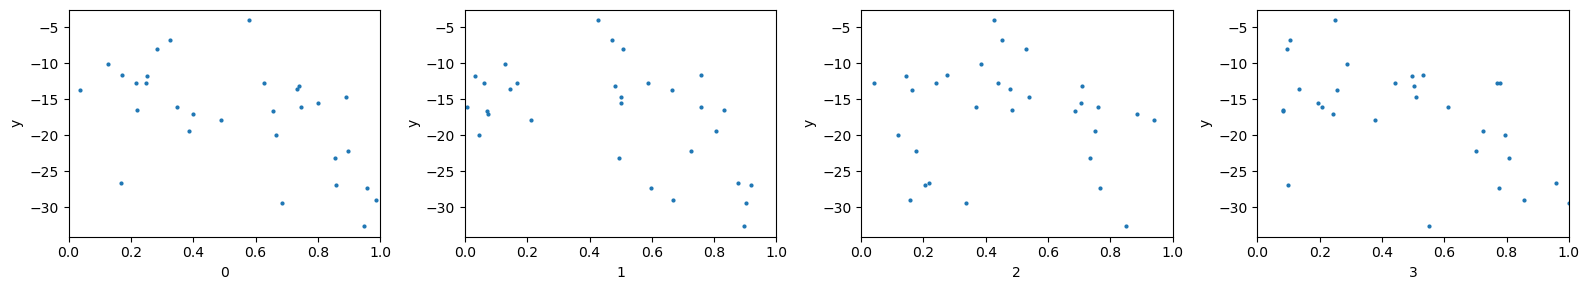

In [251]:
f4_folder = './function_4'
f4_initial_in = np.load(f4_folder + '/initial_inputs.npy')
f4_initial_out = np.load(f4_folder + '/initial_outputs.npy')

f4_df = pd.DataFrame(f4_initial_in)
f4_X_cols = f4_df.columns
f4_df['y'] = f4_initial_out

display(f4_df.shape)
display(f4_df.head(30))

fig, ax = plt.subplots(1, len(f4_X_cols))

for c in f4_X_cols:
    f4_df.plot.scatter(x=c, y='y', figsize=(16,3), ax=ax[c], s=4)
    ax[c].set_xlim(0, 1)

plt.tight_layout()
plt.show()

(30, 5)

,0,1,2,3,y
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified lower bound 1.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning:

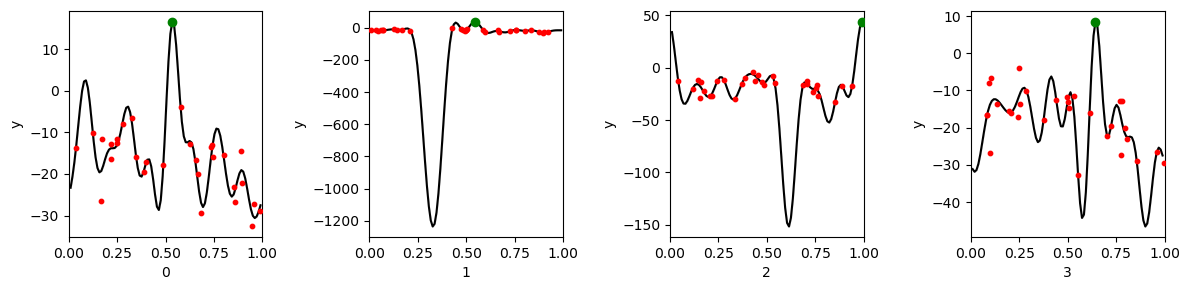


Suggestion: 0.534646-0.544545-0.990000-0.643535 

Col 0 top suggestions


,x,y,std,value
53,0.534646,16.542255,0.000102,16.543270
54,0.544545,15.464898,0.000086,15.465757
52,0.524747,13.602672,0.000104,13.603709
55,0.554444,11.036813,0.000061,11.037427
51,0.514848,6.951923,0.000090,6.952828


Col 1 top suggestions


,x,y,std,value
54,0.544545,37.381159,0.000038,37.381537
55,0.554444,33.317959,0.000036,33.318324
53,0.534646,32.916175,0.000035,32.916521
44,0.445556,31.795389,0.000045,31.795836
45,0.455455,24.015536,0.000035,24.015885


Col 2 top suggestions


,x,y,std,value
99,0.990000,44.019759,0.000262,44.022375
98,0.980101,38.646747,0.000242,38.649169
0,0.010000,34.050799,0.000210,34.052899
97,0.970202,27.320207,0.000196,27.322170
1,0.019899,21.014696,0.000150,21.016194


Col 3 top suggestions


,x,y,std,value
64,0.643535,8.505069,0.000050,8.505568
65,0.653434,7.299891,0.000055,7.300436
63,0.633636,4.708642,0.000038,4.709024
66,0.663333,1.998714,0.000051,1.999226
62,0.623737,-3.729349,0.000022,-3.729126


In [443]:
beta = 10
ylim = (0, -50)

display(f4_df.shape)
display(f4_df.head())

suggestion = []
af_dfs = []

fig, ax = plt.subplots(1, len(f4_X_cols), figsize=(12,3))
for c in f4_X_cols:

    # surrogate model
    # kernel = RBF(1.0, length_scale_bounds=(1e-100, 1))
    # kernel = Matern(length_scale=1e-5, length_scale_bounds=(1e-1, 10), nu=1.5)
    # kernel = 1.0 * RationalQuadratic(length_scale=0.1, alpha=0.1, alpha_bounds=(1e-4, 1e15))
    # kernel = Matern(length_scale=1, length_scale_bounds='fixed', nu=1.5)
    from sklearn.gaussian_process.kernels import ExpSineSquared
    kernel = ExpSineSquared(
        length_scale=1.0,
        periodicity=1.0,
        length_scale_bounds=(1, 10.0),
        periodicity_bounds=(1.0, 10.0),
    )

    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(f4_df[[c]], f4_df['y'])

    # surrogate preds
    pred_X = np.linspace(0.01, 0.99, 100).reshape(-1, 1)
    pred_y_mean, pred_y_std = gpr.predict(pred_X, return_std=True)

    # acquisition function
    pred_value = pred_y_mean + (beta * pred_y_std)
    best_x = pred_X[np.argmax(pred_value),0]
    best_y = pred_y_mean[np.argmax(pred_value)]

    # plot charts
    ax[c].plot(pred_X[:,0], pred_y_mean, color="black", label="Mean")
    ax[c].fill_between(
        pred_X[:,0],
        pred_y_mean - pred_y_std,
        pred_y_mean + pred_y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax[c].scatter(x=best_x, y=best_y, zorder=110, color='g')
    f4_df.plot.scatter(x=c, y='y', ax=ax[c], s=10, zorder=100, color='r')
    ax[c].set_xlim(0, 1)
    # ax[c].set_ylim(*ylim)

    af_dfs.append(pd.DataFrame({'x': pred_X[:,0], 'y': pred_y_mean, 'std': pred_y_std, 'value': pred_value}).sort_values(by='value', ascending=False).head(5))
    suggestion.append(best_x)

plt.tight_layout()
plt.show()

print('\nSuggestion:', suggestion_to_out(suggestion), '\n')
for i, df in enumerate(af_dfs):
    print('Col', i, 'top suggestions')
    display(df)

## Function 5: Yield in a Chemical Reaction

This time you are trying to optimise another four-dimensional black-box. It corresponds to the yield of a chemical process after processing in some factory. This type of process tends to be unimodal. Try to find the combination of chemicals that maximizes the yield!

(20, 5)

,0,1,2,3,y
0,0.191447,0.038193,0.607418,0.414584,64.443440
1,0.758653,0.536518,0.656000,0.360342,18.301380
2,0.438350,0.804340,0.210245,0.151295,0.112940
3,0.706051,0.534192,0.264243,0.482088,4.210898
4,0.836478,0.193610,0.663893,0.785649,258.370525
5,0.683432,0.118663,0.829046,0.567577,78.434389
6,0.553621,0.667350,0.323806,0.814870,57.571537
7,0.352356,0.322242,0.116979,0.473113,109.571876
8,0.153786,0.729382,0.422598,0.443074,8.847992
9,0.463442,0.630025,0.107906,0.957644,233.223610


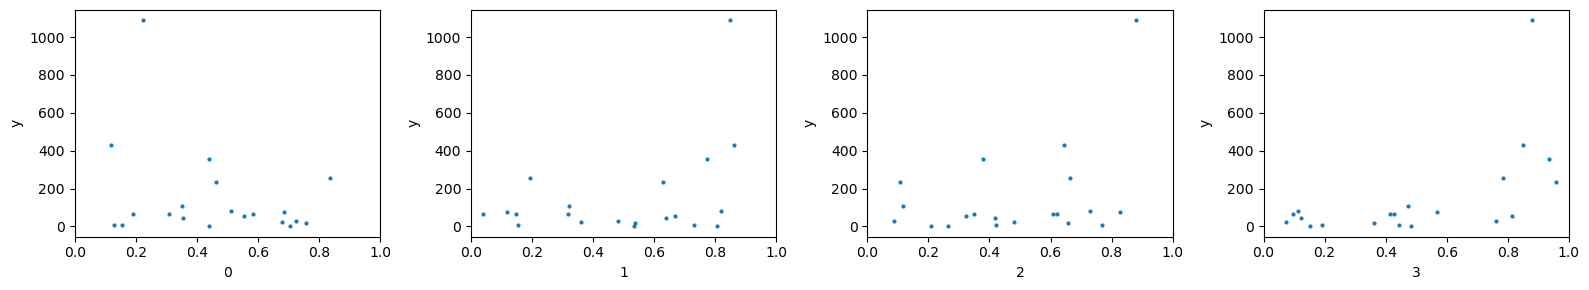

In [337]:
f5_folder = './function_5'
f5_initial_in = np.load(f5_folder + '/initial_inputs.npy')
f5_initial_out = np.load(f5_folder + '/initial_outputs.npy')

f5_df = pd.DataFrame(f5_initial_in)
f5_X_cols = f5_df.columns
f5_df['y'] = f5_initial_out

display(f5_df.shape)
display(f5_df)

fig, ax = plt.subplots(1, len(f5_X_cols))

for c in f5_X_cols:
    f5_df.plot.scatter(x=c, y='y', figsize=(16,3), ax=ax[c], s=4)
    ax[c].set_xlim(0, 1)

plt.tight_layout()
plt.show()

(20, 5)

,0,1,2,3,y
0,0.191447,0.038193,0.607418,0.414584,64.443440
1,0.758653,0.536518,0.656000,0.360342,18.301380
2,0.438350,0.804340,0.210245,0.151295,0.112940
3,0.706051,0.534192,0.264243,0.482088,4.210898
4,0.836478,0.193610,0.663893,0.785649,258.370525


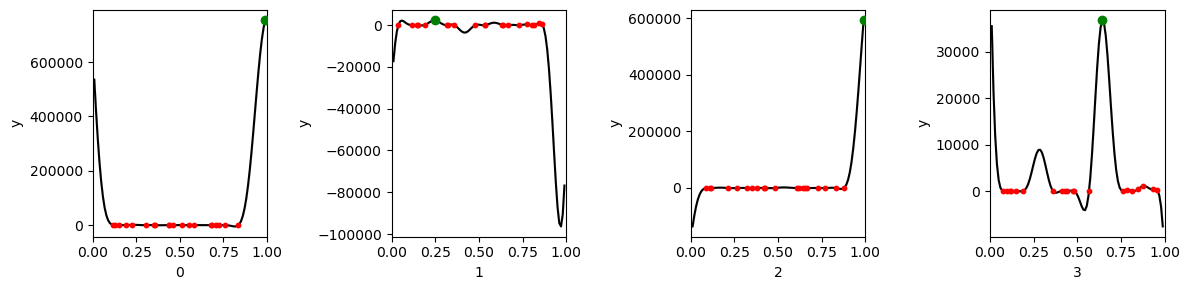


Suggestion: 0.990000-0.247576-0.990000-0.643535 

Col 0 top suggestions


,x,y,std,value
99,0.990000,753460.079047,0.642179,753492.188004
98,0.980101,725875.453808,0.579235,725904.415540
97,0.970202,683612.417977,0.513614,683638.098667
96,0.960303,628506.645165,0.446902,628528.990245
95,0.950404,563192.656538,0.380802,563211.696661


Col 1 top suggestions


,x,y,std,value
24,0.247576,2324.755774,0.000840,2324.797787
23,0.237677,2254.401653,0.000772,2254.440245
5,0.059495,2196.116697,0.003933,2196.313334
25,0.257475,2135.239080,0.000811,2135.279606
22,0.227778,1941.972285,0.000620,1942.003268


Col 2 top suggestions


,x,y,std,value
99,0.990000,592734.412224,0.387024,592753.763448
98,0.980101,512305.693258,0.321588,512321.772655
97,0.970202,428937.845119,0.259976,428950.843918
96,0.960303,346691.880520,0.203696,346702.065328
95,0.950404,269281.444393,0.153932,269289.140970


Col 3 top suggestions


,x,y,std,value
64,0.643535,36707.026264,0.011104,36707.581453
65,0.653434,36060.739069,0.011512,36061.314644
0,0.010000,35454.801612,0.022582,35455.930735
63,0.633636,35176.672638,0.010094,35177.177360
66,0.663333,33391.477918,0.011268,33392.041324


In [451]:
beta = 50
ylim = (0, -50)

display(f5_df.shape)
display(f5_df.head())

suggestion = []
af_dfs = []

fig, ax = plt.subplots(1, len(f5_X_cols), figsize=(12,3))
for c in f5_X_cols:

    # surrogate model
    kernel = RBF(0.1, length_scale_bounds='fixed')
    # kernel = Matern(length_scale=0.1, length_scale_bounds=(1e-3, 1), nu=1.5)
    # kernel = 1.0 * RationalQuadratic(length_scale=0.1, alpha=0.1, alpha_bounds=(1e-4, 1e15))
    # from sklearn.gaussian_process.kernels import ExpSineSquared
    # kernel = ExpSineSquared(
    #     length_scale=1.0,
    #     periodicity=1.0,
    #     length_scale_bounds=(1, 10.0),
    #     periodicity_bounds=(1.0, 10.0),
    # )

    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(f5_df[[c]], f5_df['y'])

    # surrogate preds
    pred_X = np.linspace(0.01, 0.99, 100).reshape(-1, 1)
    pred_y_mean, pred_y_std = gpr.predict(pred_X, return_std=True)

    # acquisition function
    pred_value = pred_y_mean + (beta * pred_y_std)
    best_x = pred_X[np.argmax(pred_value),0]
    best_y = pred_y_mean[np.argmax(pred_value)]

    # plot charts
    ax[c].plot(pred_X[:,0], pred_y_mean, color="black", label="Mean")
    ax[c].fill_between(
        pred_X[:,0],
        pred_y_mean - pred_y_std,
        pred_y_mean + pred_y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax[c].scatter(x=best_x, y=best_y, zorder=110, color='g')
    f5_df.plot.scatter(x=c, y='y', ax=ax[c], s=10, zorder=100, color='r')
    ax[c].set_xlim(0, 1)
    # ax[c].set_ylim(*ylim)

    af_dfs.append(pd.DataFrame({'x': pred_X[:,0], 'y': pred_y_mean, 'std': pred_y_std, 'value': pred_value}).sort_values(by='value', ascending=False).head(5))
    suggestion.append(best_x)

plt.tight_layout()
plt.show()

print('\nSuggestion:', suggestion_to_out(suggestion), '\n')
for i, df in enumerate(af_dfs):
    print('Col', i, 'top suggestions')
    display(df)

## Function 6: Cake and Stuff

Time to get cooking! You are optimising a cake recipe. There are five ingredients. The outputs correspond to the sum of different objectives: flavor, consistency, calories, waste and cost. Each objective receives negative points by our expert taster. You want this sum to be as close to zero as possible!

(20, 6)

,0,1,2,3,4,y
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237


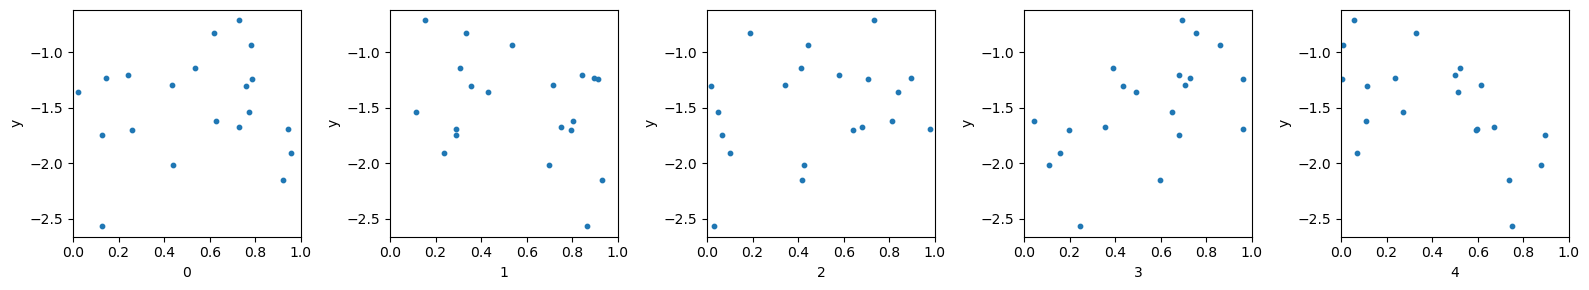

In [353]:
f6_folder = './function_6'
f6_initial_in = np.load(f6_folder + '/initial_inputs.npy')
f6_initial_out = np.load(f6_folder + '/initial_outputs.npy')

f6_df = pd.DataFrame(f6_initial_in)
f6_X_cols = f6_df.columns
f6_df['y'] = f6_initial_out

display(f6_df.shape)
display(f6_df.head())

fig, ax = plt.subplots(1, len(f6_X_cols))

for c in f6_X_cols:
    f6_df.plot.scatter(x=c, y='y', figsize=(16,3), ax=ax[c], s=10)
    ax[c].set_xlim(0, 1)

plt.tight_layout()
plt.show()

(20, 6)

,0,1,2,3,4,y
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237


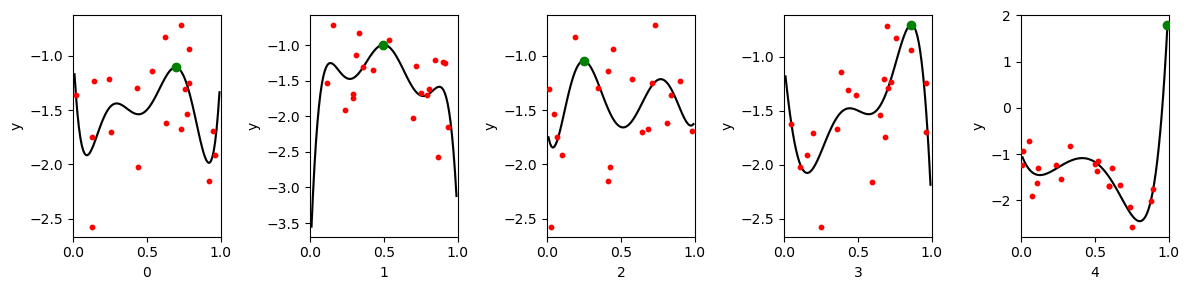


Suggestion: 0.693030-0.495051-0.247576-0.861313-0.990000 

Col 0 top suggestions


,x,y,std,value
69,0.693030,-1.106540,0.000005,-1.106526
68,0.683131,-1.108806,0.000005,-1.108792
70,0.702929,-1.109019,0.000005,-1.109006
67,0.673232,-1.115488,0.000005,-1.115473
71,0.712828,-1.116531,0.000004,-1.116518


Col 1 top suggestions


,x,y,std,value
49,0.495051,-0.995987,0.000007,-0.995965
50,0.504949,-0.997231,0.000008,-0.997209
48,0.485152,-0.999201,0.000007,-0.999179
51,0.514848,-1.002988,0.000008,-1.002965
47,0.475253,-1.006764,0.000007,-1.006743


Col 2 top suggestions


,x,y,std,value
24,0.247576,-1.046219,0.000008,-1.046194
23,0.237677,-1.048824,0.000008,-1.048799
25,0.257475,-1.049105,0.000008,-1.049080
22,0.227778,-1.057150,0.000008,-1.057125
26,0.267374,-1.057161,0.000008,-1.057137


Col 3 top suggestions


,x,y,std,value
86,0.861313,-0.704562,0.000009,-0.704534
85,0.851414,-0.708979,0.000009,-0.708952
87,0.871212,-0.710727,0.000009,-0.710699
84,0.841515,-0.722623,0.000008,-0.722598
88,0.881111,-0.728901,0.000010,-0.728873


Col 4 top suggestions


,x,y,std,value
99,0.990000,1.801081,0.000116,1.801427
98,0.980101,1.227165,0.000096,1.227453
97,0.970202,0.709860,0.000079,0.710095
96,0.960303,0.245449,0.000063,0.245640
95,0.950404,-0.169636,0.000050,-0.169484


In [453]:
beta = 3
ylim = (0, -50)

display(f6_df.shape)
display(f6_df.head())

suggestion = []
af_dfs = []

fig, ax = plt.subplots(1, len(f6_X_cols), figsize=(12,3))
for c in f6_X_cols:

    # surrogate model
    kernel = RBF(0.1, length_scale_bounds=(1e-1, 1))
    kernel = RBF(1, length_scale_bounds='fixed')
    # kernel = Matern(length_scale=0.1, length_scale_bounds=(1e-1, 10), nu=1.5)
    # kernel = 1.0 * RationalQuadratic(length_scale=0.1, alpha=0.1, alpha_bounds=(1e-4, 1e15))
    # from sklearn.gaussian_process.kernels import ExpSineSquared
    # kernel = ExpSineSquared(
    #     length_scale=1.0,
    #     periodicity=1.0,
    #     length_scale_bounds=(1, 10.0),
    #     periodicity_bounds=(1.0, 10.0),
    # )

    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(f6_df[[c]], f6_df['y'])

    # surrogate preds
    pred_X = np.linspace(0.01, 0.99, 100).reshape(-1, 1)
    pred_y_mean, pred_y_std = gpr.predict(pred_X, return_std=True)

    # acquisition function
    pred_value = pred_y_mean + (beta * pred_y_std)
    best_x = pred_X[np.argmax(pred_value),0]
    best_y = pred_y_mean[np.argmax(pred_value)]

    # plot charts
    ax[c].plot(pred_X[:,0], pred_y_mean, color="black", label="Mean")
    ax[c].fill_between(
        pred_X[:,0],
        pred_y_mean - pred_y_std,
        pred_y_mean + pred_y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax[c].scatter(x=best_x, y=best_y, zorder=90, color='g')
    f6_df.plot.scatter(x=c, y='y', ax=ax[c], s=10, zorder=100, color='r')
    ax[c].set_xlim(0, 1)
    # ax[c].set_ylim(*ylim)

    af_dfs.append(pd.DataFrame({'x': pred_X[:,0], 'y': pred_y_mean, 'std': pred_y_std, 'value': pred_value}).sort_values(by='value', ascending=False).head(5))
    suggestion.append(best_x)

plt.tight_layout()
plt.show()

print('\nSuggestion:', suggestion_to_out(suggestion), '\n')
for i, df in enumerate(af_dfs):
    print('Col', i, 'top suggestions')
    display(df)

## Function 7: Sometimes Lazy is Best

You are now optimising six hyper-parameters of a machine learning model. Note that it is a popular and frequently used model, so maybe you could search to see if anyone else has optisized it before?

(30, 7)

,0,1,2,3,4,5,y
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265,0.007503
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236,0.061424
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047


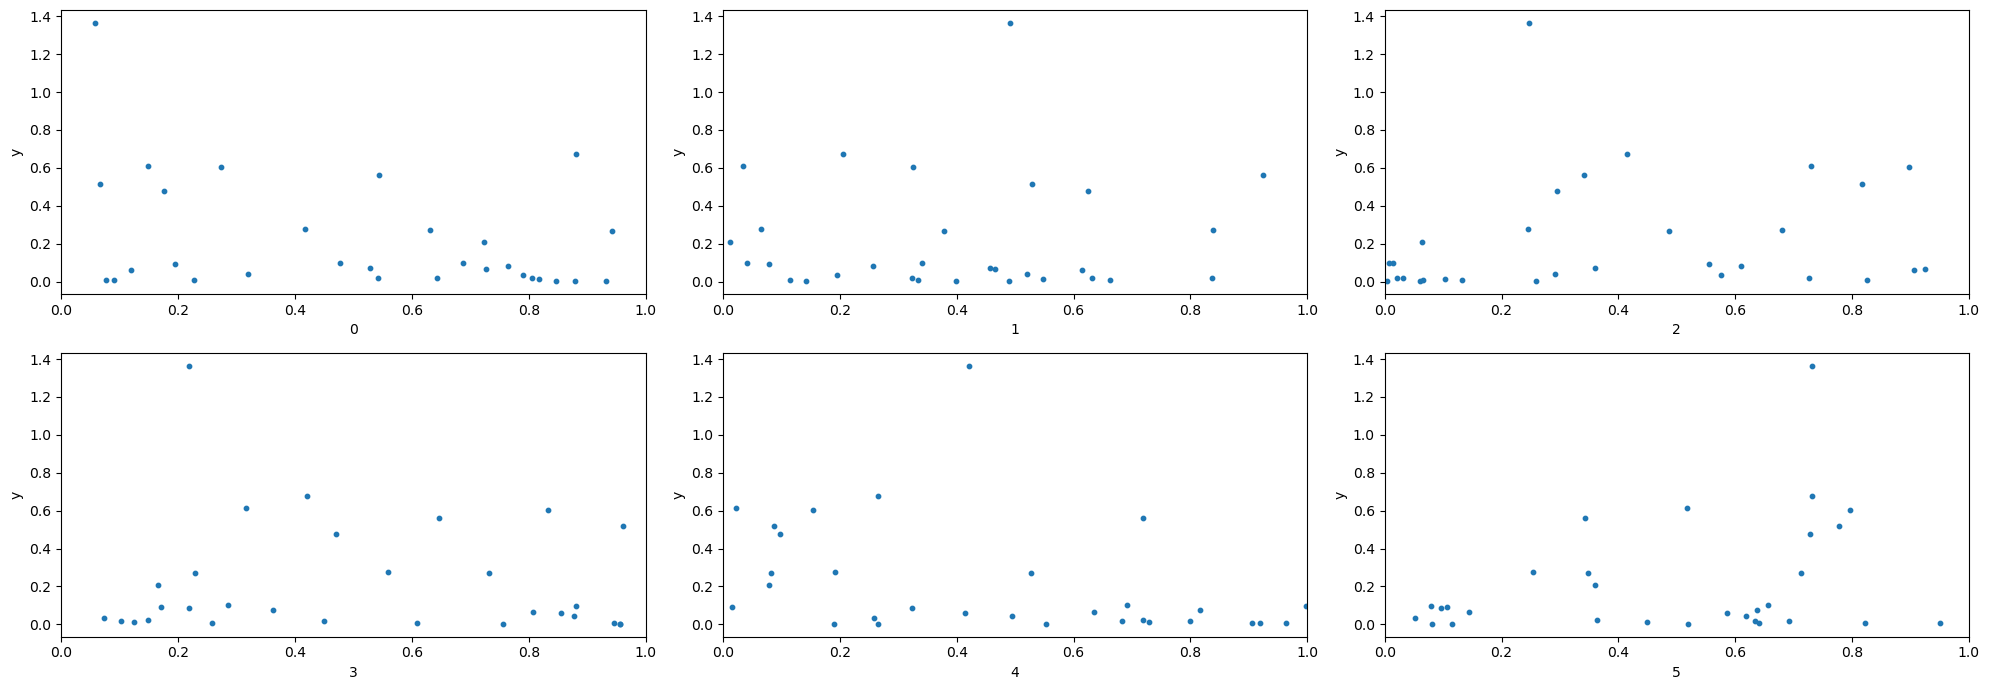

In [371]:
f7_folder = './function_7'
f7_initial_in = np.load(f7_folder + '/initial_inputs.npy')
f7_initial_out = np.load(f7_folder + '/initial_outputs.npy')

f7_df = pd.DataFrame(f7_initial_in)
f7_X_cols = f7_df.columns
f7_df['y'] = f7_initial_out

display(f7_df.shape)
display(f7_df.head())

plt.figure(figsize=(20, 10))
for c in f7_X_cols:
    ax = plt.subplot(3, 3, c + 1)
    f7_df.plot.scatter(x=c, y='y', ax=ax, s=10)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()

(30, 7)

,0,1,2,3,4,5,y
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265,0.007503
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236,0.061424
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceW

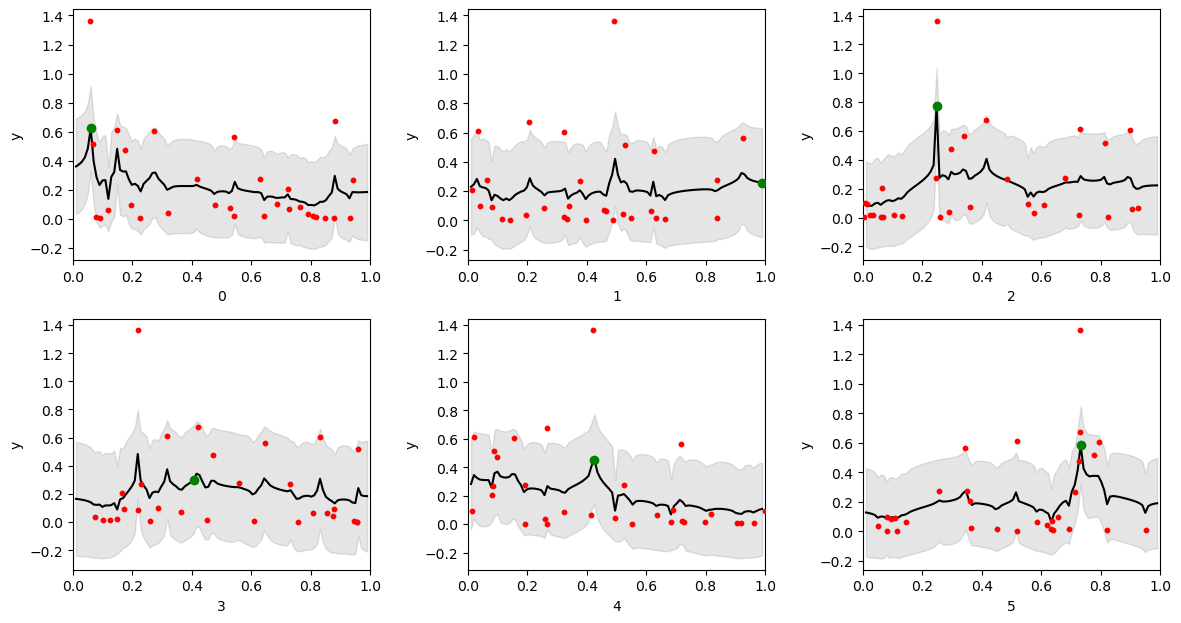


Suggestion: 0.059495-0.990000-0.247576-0.405960-0.425758-0.732626 

Col 0 top suggestions


,x,y,std,value
5,0.059495,0.621540,0.293713,2.090103
4,0.049596,0.481695,0.312768,2.045533
3,0.039697,0.421527,0.320484,2.023946
2,0.029798,0.392133,0.324909,2.016679
1,0.019899,0.373477,0.328072,2.013837


Col 1 top suggestions


,x,y,std,value
99,0.990000,0.257150,0.371815,2.116224
98,0.980101,0.260441,0.370319,2.112038
97,0.970202,0.264549,0.368558,2.107337
96,0.960303,0.269901,0.366389,2.101845
95,0.950404,0.277362,0.363519,2.094958


Col 2 top suggestions


,x,y,std,value
24,0.247576,0.771887,0.262822,2.085995
42,0.425758,0.331756,0.321774,1.940627
40,0.405960,0.344214,0.319133,1.939878
43,0.435657,0.308206,0.325211,1.934264
39,0.396061,0.318050,0.322738,1.931738


Col 3 top suggestions


,x,y,std,value
40,0.405960,0.301464,0.383153,2.217226
50,0.504949,0.261066,0.390289,2.212512
41,0.415859,0.343724,0.373576,2.211605
51,0.514848,0.256698,0.390974,2.211570
39,0.396061,0.282004,0.385671,2.210358


Col 4 top suggestions


,x,y,std,value
42,0.425758,0.454361,0.316850,2.038610
43,0.435657,0.364594,0.325411,1.991647
44,0.445556,0.322710,0.328345,1.964433
12,0.128788,0.327308,0.325656,1.955589
39,0.396061,0.319786,0.327020,1.954886


Col 5 top suggestions


,x,y,std,value
73,0.732626,0.584445,0.261743,1.893161
74,0.742525,0.425148,0.280837,1.829335
75,0.752424,0.387107,0.284523,1.809720
76,0.762323,0.372528,0.284656,1.795807
72,0.722727,0.415454,0.272371,1.777311


In [415]:
beta = 5
ylim = (0, -50)

display(f7_df.shape)
display(f7_df.head())

suggestion = []
af_dfs = []

fig = plt.figure(figsize=(12,9))
ax = []
for c in f7_X_cols:

    ax.append(plt.subplot(3, 3, c + 1))

    # surrogate model
    kernel = RBF(1, length_scale_bounds=(1, 100))
    # kernel = RBF(1, length_scale_bounds='fixed')
    kernel = Matern(length_scale=0.1, length_scale_bounds=(1e-1, 10), nu=1.5)
    kernel = RationalQuadratic(length_scale=1, alpha=0.1, alpha_bounds=(1e-4, 1e15))
    # from sklearn.gaussian_process.kernels import ExpSineSquared
    # kernel = ExpSineSquared(
    #     length_scale=1.0,
    #     periodicity=1.0,
    #     length_scale_bounds=(1, 10.0),
    #     periodicity_bounds=(1.0, 10.0),
    # )

    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(f7_df[[c]], f7_df['y'])

    # surrogate preds
    pred_X = np.linspace(0.01, 0.99, 100).reshape(-1, 1)
    pred_y_mean, pred_y_std = gpr.predict(pred_X, return_std=True)

    # acquisition function
    pred_value = pred_y_mean + (beta * pred_y_std)
    best_x = pred_X[np.argmax(pred_value),0]
    best_y = pred_y_mean[np.argmax(pred_value)]

    # plot charts
    ax[c].plot(pred_X[:,0], pred_y_mean, color="black", label="Mean")
    ax[c].fill_between(
        pred_X[:,0],
        pred_y_mean - pred_y_std,
        pred_y_mean + pred_y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax[c].scatter(x=best_x, y=best_y, zorder=90, color='g')
    f7_df.plot.scatter(x=c, y='y', ax=ax[c], s=10, zorder=100, color='r')
    ax[c].set_xlim(0, 1)
    # ax[c].set_ylim(*ylim)

    af_dfs.append(pd.DataFrame({'x': pred_X[:,0], 'y': pred_y_mean, 'std': pred_y_std, 'value': pred_value}).sort_values(by='value', ascending=False).head(5))
    suggestion.append(best_x)

plt.tight_layout()
plt.show()

print('\nSuggestion:', suggestion_to_out(suggestion), '\n')
for i, df in enumerate(af_dfs):
    print('Col', i, 'top suggestions')
    display(df)

## Function 8: High-dimensional Optimisation

You’ve reach the final, 8-dimensional search space. High-dimensional black-box optimisation can be very difficult, so sticking to local solutions is not the worst idea here.

(40, 9)

,0,1,2,3,4,5,6,7,y
14,0.056447,0.065956,0.022929,0.038786,0.403935,0.801055,0.488307,0.893085,9.598482
26,0.192640,0.630677,0.416796,0.490529,0.796086,0.654567,0.276241,0.295518,9.344274
39,0.481245,0.102461,0.219486,0.677322,0.247509,0.244341,0.163825,0.715962,9.183005
22,0.145120,0.119328,0.420888,0.387609,0.155423,0.875172,0.510560,0.728611,9.141639
19,0.044329,0.013581,0.258198,0.577644,0.051280,0.158563,0.591030,0.077953,9.013075
12,0.143550,0.937415,0.232325,0.009043,0.414579,0.409325,0.553779,0.205841,8.976554
25,0.028947,0.028279,0.481372,0.613175,0.672660,0.022113,0.601483,0.524885,8.830745
23,0.338954,0.566932,0.376751,0.098916,0.659452,0.245548,0.762483,0.732153,8.817558
4,0.359909,0.249076,0.495997,0.709215,0.114987,0.289207,0.557295,0.593882,8.606117
5,0.778818,0.003419,0.337983,0.519528,0.820907,0.537247,0.551347,0.660032,8.541748


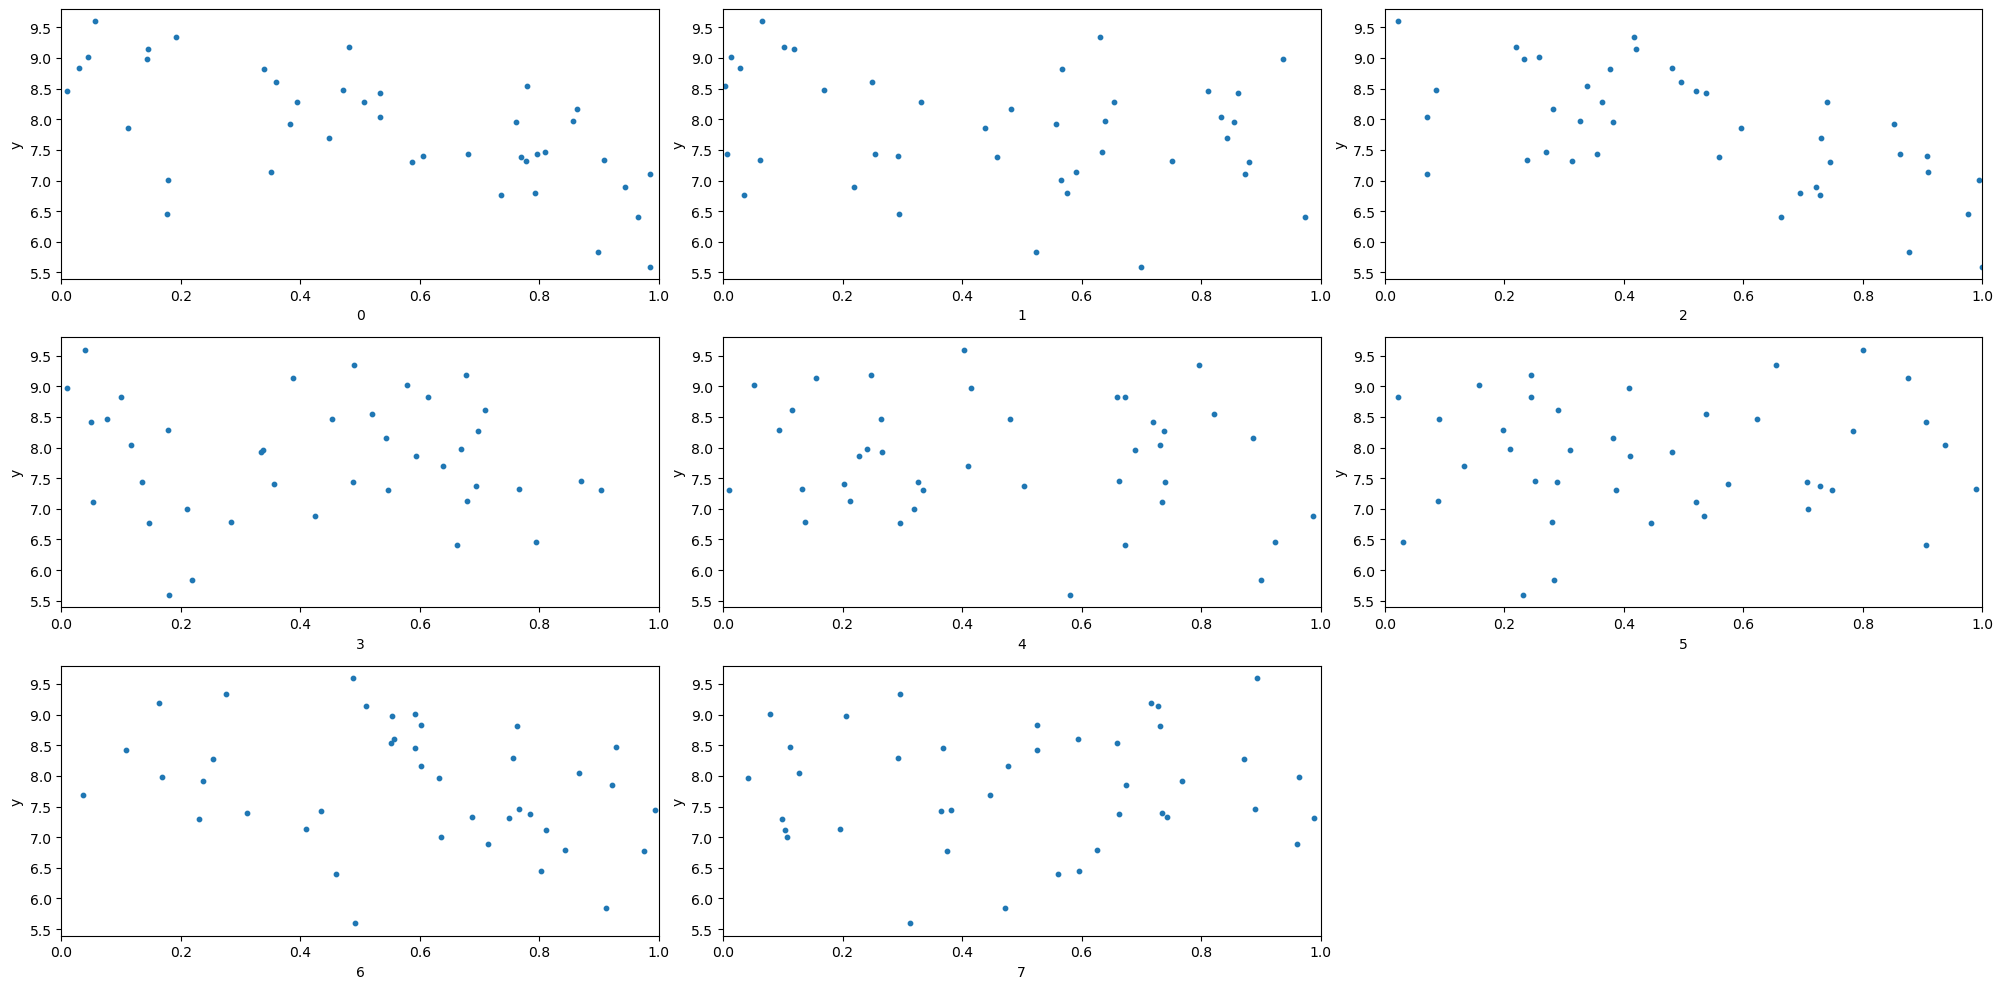

In [417]:
f8_folder = './function_8'
f8_initial_in = np.load(f8_folder + '/initial_inputs.npy')
f8_initial_out = np.load(f8_folder + '/initial_outputs.npy')

f8_df = pd.DataFrame(f8_initial_in)
f8_X_cols = f8_df.columns
f8_df['y'] = f8_initial_out

display(f8_df.shape)
display(f8_df.sort_values(by='y', ascending=False).head(40))

plt.figure(figsize=(20, 10))
for c in f8_X_cols:
    ax = plt.subplot(3, 3, c + 1)
    f8_df.plot.scatter(x=c, y='y', ax=ax, s=10)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()

(40, 9)

,0,1,2,3,4,5,6,7,y
0,0.604994,0.292215,0.908453,0.355506,0.201669,0.575338,0.310311,0.734281,7.398721
1,0.178007,0.566223,0.994862,0.210325,0.320153,0.707909,0.635384,0.107132,7.005227
2,0.009077,0.811626,0.520520,0.075687,0.265112,0.091652,0.592415,0.367320,8.459482
3,0.506028,0.653730,0.363411,0.177981,0.093728,0.197425,0.755827,0.292472,8.284008
4,0.359909,0.249076,0.495997,0.709215,0.114987,0.289207,0.557295,0.593882,8.606117


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceW

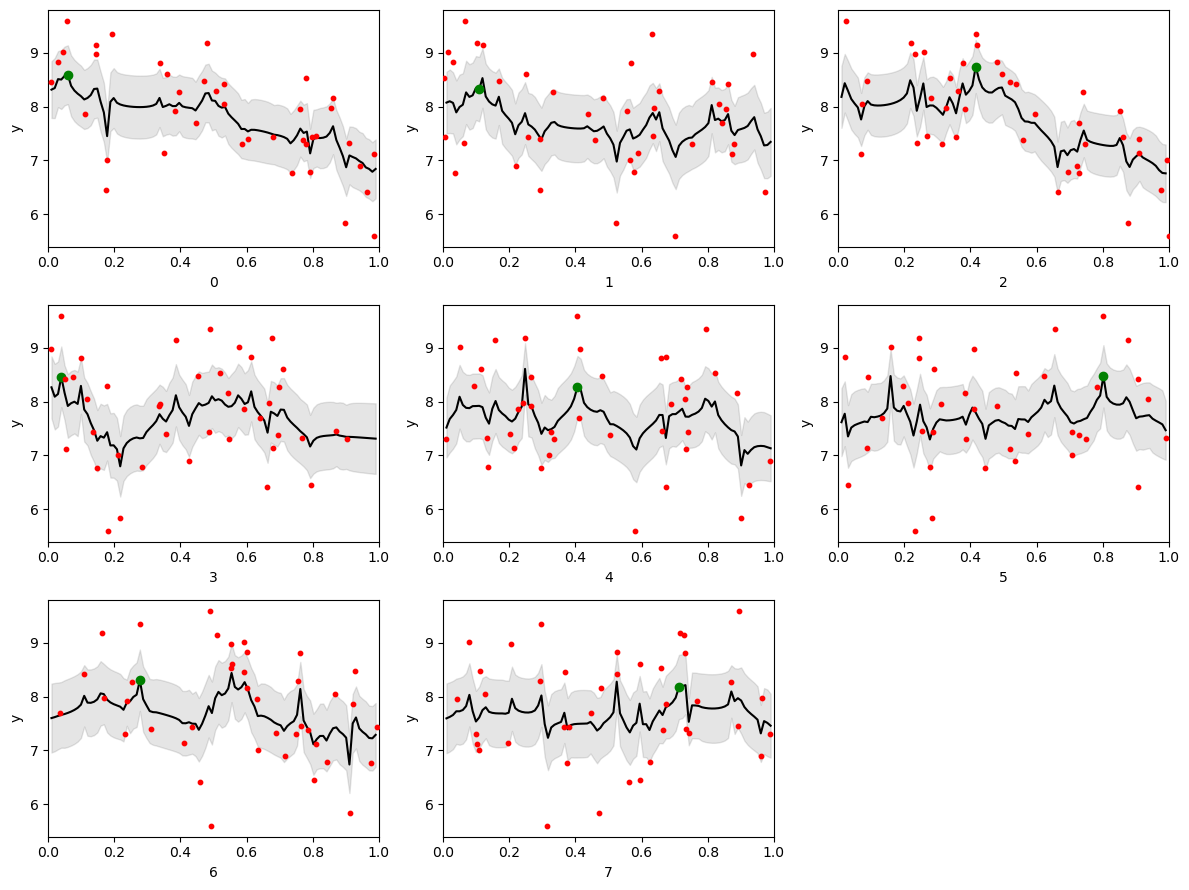


Suggestion: 0.059495-0.108990-0.415859-0.039697-0.405960-0.801919-0.277273-0.712828 

Col 0 top suggestions


,x,y,std,value
5,0.059495,8.593756,0.547465,11.331082
4,0.049596,8.570860,0.547099,11.306353
3,0.039697,8.504195,0.548273,11.245558
6,0.069394,8.387648,0.567442,11.224857
7,0.079293,8.299468,0.572140,11.160168


Col 1 top suggestions


,x,y,std,value
10,0.108990,8.325372,0.600660,11.328671
9,0.099091,8.345623,0.595478,11.323011
11,0.118889,8.530634,0.552462,11.292945
8,0.089192,8.210534,0.610056,11.260815
12,0.128788,8.188783,0.611419,11.245880


Col 2 top suggestions


,x,y,std,value
41,0.415859,8.746811,0.494845,11.221036
42,0.425758,8.507943,0.536992,11.192900
1,0.019899,8.435741,0.545581,11.163645
43,0.435657,8.357301,0.556415,11.139376
40,0.405960,8.393739,0.546761,11.127546


Col 3 top suggestions


,x,y,std,value
3,0.039697,8.462035,0.564623,11.285148
2,0.029798,8.141731,0.605296,11.168212
1,0.019899,8.092109,0.610361,11.143916
0,0.010000,8.266217,0.575391,11.143173
57,0.574242,8.116819,0.590059,11.067115


Col 4 top suggestions


,x,y,std,value
40,0.405960,8.274569,0.575541,11.152272
41,0.415859,8.222776,0.576186,11.103708
39,0.396061,8.053598,0.608135,11.094274
79,0.792020,8.054315,0.604926,11.078946
4,0.049596,8.090641,0.593808,11.059680


Col 5 top suggestions


,x,y,std,value
80,0.801919,8.471763,0.579992,11.371720
65,0.653434,8.298441,0.586818,11.232533
81,0.811818,8.088250,0.624092,11.208711
79,0.792020,8.112740,0.611702,11.171252
82,0.821717,8.004572,0.631069,11.159917


Col 6 top suggestions


,x,y,std,value
27,0.277273,8.305315,0.571399,11.162309
55,0.554444,8.440714,0.542049,11.150960
56,0.564343,8.180538,0.592347,11.142275
58,0.584141,8.175420,0.591022,11.130532
57,0.574242,8.132618,0.599255,11.128892


Col 7 top suggestions


,x,y,std,value
71,0.712828,8.179765,0.598294,11.171237
72,0.722727,8.192694,0.595376,11.169575
70,0.702929,7.978808,0.616167,11.059643
90,0.900909,7.927314,0.616703,11.010828
69,0.693030,7.891692,0.618372,10.983554


In [457]:
beta = 5
ylim = (0, -50)

display(f8_df.shape)
display(f8_df.head())

suggestion = []
af_dfs = []

fig = plt.figure(figsize=(12,9))
ax = []
for c in f8_X_cols:

    ax.append(plt.subplot(3, 3, c + 1))

    # surrogate model
    kernel = RBF(1, length_scale_bounds=(1, 100))
    # kernel = RBF(1, length_scale_bounds='fixed')
    kernel = Matern(length_scale=0.1, length_scale_bounds=(1e-1, 10), nu=1.5)
    kernel = RationalQuadratic(length_scale=1, alpha=0.1, alpha_bounds=(1e-4, 1e15))
    # from sklearn.gaussian_process.kernels import ExpSineSquared
    # kernel = ExpSineSquared(
    #     length_scale=1.0,
    #     periodicity=1.0,
    #     length_scale_bounds=(1, 10.0),
    #     periodicity_bounds=(1.0, 10.0),
    # )

    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gpr.fit(f8_df[[c]], f8_df['y'])

    # surrogate preds
    pred_X = np.linspace(0.01, 0.99, 100).reshape(-1, 1)
    pred_y_mean, pred_y_std = gpr.predict(pred_X, return_std=True)

    # acquisition function
    pred_value = pred_y_mean + (beta * pred_y_std)
    best_x = pred_X[np.argmax(pred_value),0]
    best_y = pred_y_mean[np.argmax(pred_value)]

    # plot charts
    ax[c].plot(pred_X[:,0], pred_y_mean, color="black", label="Mean")
    ax[c].fill_between(
        pred_X[:,0],
        pred_y_mean - pred_y_std,
        pred_y_mean + pred_y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax[c].scatter(x=best_x, y=best_y, zorder=90, color='g')
    f8_df.plot.scatter(x=c, y='y', ax=ax[c], s=10, zorder=100, color='r')
    ax[c].set_xlim(0, 1)
    # ax[c].set_ylim(*ylim)

    af_dfs.append(pd.DataFrame({'x': pred_X[:,0], 'y': pred_y_mean, 'std': pred_y_std, 'value': pred_value}).sort_values(by='value', ascending=False).head(5))
    suggestion.append(best_x)

plt.tight_layout()
plt.show()

print('\nSuggestion:', suggestion_to_out(suggestion), '\n')
for i, df in enumerate(af_dfs):
    print('Col', i, 'top suggestions')
    display(df)

## Combine them in list 
Stack them up, see if we can craft a function to suggest where to look for next values...

In [55]:
functions = []

for n in range(8):
    sn = str(n+1)
    functions.append({
        'name': 'function ' + sn,
        'initial_in': eval('f' + sn + '_initial_in'),
        'initial_out': eval('f' + sn + '_initial_out'),
        'df': eval('f' + sn + '_df'),
        'X_cols': eval('f' + sn + '_X_cols'),
    })

# functions